#### Импортируем библиотеки

In [53]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


#### Подгрузим датасет

In [54]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print ("Количество данных ::", X.shape[0])
print("Количество  признаков::", X.shape[1])

Количество данных :: 150
Количество  признаков:: 4


#### Разобьем наш датасет на трейн и тест выборку

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

print("Размер обучающей выборки", X_train.shape, y_train.shape)
print("Размер тестовой выборки", X_test.shape, y_test.shape)

Размер обучающей выборки (105, 4) (105,)
Размер тестовой выборки (45, 4) (45,)


#### Визуализируем датасет

C:\Users\lenar\anaconda3\envs\tensor1.14\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


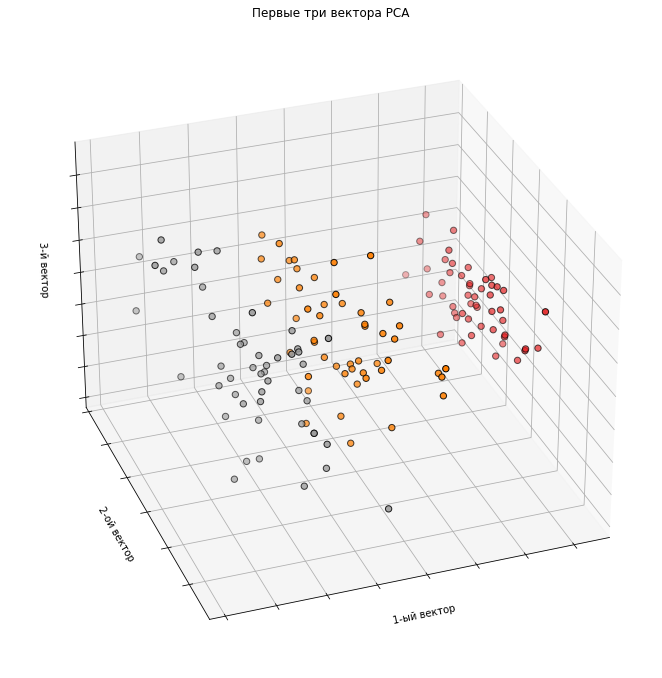

Количество признаков при визуализации  3


In [56]:
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Первые три вектора PCA")
ax.set_xlabel("1-ый вектор")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2-ой вектор")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3-й вектор")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("Количество признаков при визуализации " ,X_reduced.shape[1])

#### Метрики качества моделей -  общая точность, Recall, Precision, F1-measure

In [57]:
def performance_metrics(y_true, y_pred,
            accuracy=True, confusion_matrix=True, classification_report=True, zero_1 = True):
    if accuracy:
        print("accuracy(%):",metrics.accuracy_score(y_true, y_pred)*100,end="\n\n")
    if confusion_matrix:
        print("confusion matrix:\n",
              metrics.confusion_matrix(y_true, y_pred),end="\n\n")
   
    if classification_report:
        print("Report:\n",
              metrics.classification_report(y_true, y_pred))

#### Построим модели SVM с различными ядрами и параметрами

##### 1. Радиальное ядро

In [58]:
#Объявим различные параметры для наших моделей, чтобы по сетке найти лучшую модель
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)

svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)

print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.01904761904761898
best C      =  1.0
best gamma  =  1.0


In [59]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

SVC(gamma=1.0)

In [60]:
performance_metrics(y_test, svc.predict(X_test))

accuracy(%): 95.55555555555556

confusion matrix:
 [[14  0  0]
 [ 0 12  2]
 [ 0  0 17]]

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



#### Линейное ядро

In [61]:
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)

CV error    =  0.00952380952380949
best C      =  1.0


In [62]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
performance_metrics(y_test, svc.predict(X_test))

accuracy(%): 97.77777777777777

confusion matrix:
 [[14  0  0]
 [ 0 13  1]
 [ 0  0 17]]

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



##### Полиминальное ядро

In [64]:
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)
print('best degree = ', grid.best_estimator_.degree)

CV error    =  0.01904761904761898
best C      =  0.0001
best gamma  =  10.0
best degree =  2


In [65]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

SVC(C=0.0001, degree=2, gamma=10.0, kernel='poly')

In [66]:
performance_metrics(y_test, svc.predict(X_test))

accuracy(%): 95.55555555555556

confusion matrix:
 [[14  0  0]
 [ 0 12  2]
 [ 0  0 17]]

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



##### Сигмоидное ядро

In [67]:
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)

svc = SVC(kernel='sigmoid')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)

print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.00952380952380949
best C      =  1000.0
best gamma  =  0.001


In [68]:
svc = SVC(kernel='sigmoid', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

SVC(C=1000.0, gamma=0.001, kernel='sigmoid')

In [69]:
performance_metrics(y_test, svc.predict(X_test))

accuracy(%): 97.77777777777777

confusion matrix:
 [[14  0  0]
 [ 0 13  1]
 [ 0  0 17]]

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Вывод

Лучше всех показали себя линейное и сигмоидное ядро, достигнув одинаковой точности в 97.7777 процентов